 # LSTM
 - LSTM is a type of recurrent neural network (RNN) that can process and analyze sequential data, such as text, speech, and time series.
 - LSTMs are able to learn long-term dependencies between time steps of data

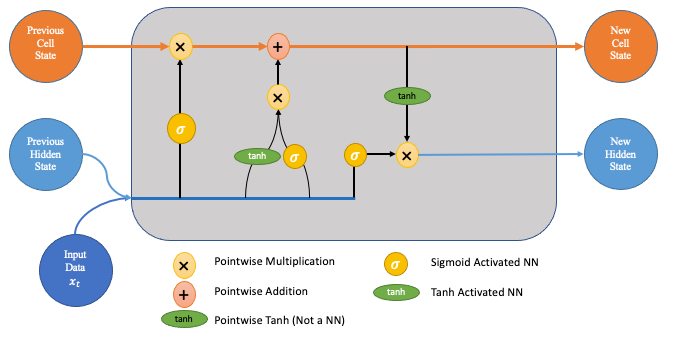

# ARIMA
-  It is a statistical analysis model that uses time series data to either better understand the data.
- a technique for time series analysis and for forecasting possible future values of a time series.

# Libraries

In [142]:
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Loading Data

In [26]:
data= pd.read_csv("AirQualityUCI.csv", sep=';', header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [27]:
data.describe()


,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


- Air Quality Indicators: CO(GT), NOx(GT), NO2(GT), C6H6(GT), etc.
- Environmental Factors: T (Temperature), RH (Relative Humidity), AH (Absolute Humidity).
- Sensor Outputs: PT08.S1(CO), PT08.S2(NMHC), PT08.S3(NOx), etc.


In [4]:
print("No of rows in dataset:",data.shape[0])
print("No of columns in dataset:",data.shape[1])

No of rows in dataset: 9471
No of columns in dataset: 17


# EDA

In [5]:
# Drop the last two columns
data = data.iloc[:, :-2]

# Verify the resulting DataFrame
print(data.head())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,786

In [6]:
print(data.isnull().sum())


Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64


In [28]:
#first labelling -200 value as null value
data.replace(to_replace=-200,value=np.nan,inplace=True)


# Handling Missing values:

Forward/Backward Fill: Use if the dataset is time-series and the values logically flow over time.

Interpolation: Use when the data is continuous, like temperature or air quality measurements.  

In [29]:
data[['CO(GT)', 'T', 'RH', 'AH']] = data[['CO(GT)', 'T', 'RH', 'AH']].fillna(method='ffill')

data[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'C6H6(GT)', ]] = \
    data[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'C6H6(GT)', ]].interpolate(method='linear')


In [ ]:
data=data.drop(columns=["Unnamed: 15", "Unnamed: 16"])
data.dropna(subset=['NOx(GT)','C6H6(GT)', 'NO2(GT)'], inplace=True)
data.drop(columns=['NMHC(GT)'],inplace=True)


In [40]:
data.isna().sum()
data = data.replace({',': ''}, regex=True)
# Convert the affected columns to float (you may need to specify columns manually if needed)
data = data.apply(pd.to_numeric, errors='coerce')

# Verify the transformation
print(data.head())


   CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0      11.9         1046.0    166.0        1056.0   
1     2.0       1292.0       9.4          955.0    103.0        1174.0   
2     2.2       1402.0       9.0          939.0    131.0        1140.0   
3     2.2       1376.0       9.2          948.0    172.0        1092.0   
4     1.6       1272.0       6.5          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1     92.0        1559.0        972.0  13.3  47.7  0.7255  
2    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4    116.0        1490.0       1110.0  11.2  59.6  0.7888  


In [41]:
# getting the datatypes of all the columns having null values
# first storing all the column names in a list having null values
col = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']
data = data[col]
data[col].dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [37]:
# Replace commas with periods in the entire DataFrame
data = data.replace({',': '.'}, regex=True)

# Convert the relevant columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')
data.dtypes


CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [43]:
data.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

**Inference: Missing Values are handled**



# Handling Outliers
- Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset.
- It is necessary to handle outliers because they affect the model's distribution and ultimately the model's accuracy.
- We can use boxplot to get an idea of the outliers present in the dataset.

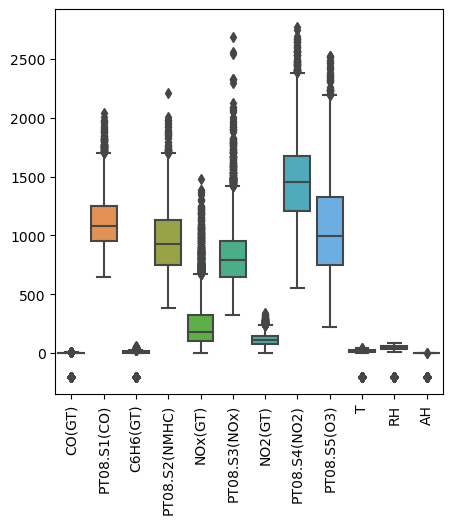

In [44]:
# plotting a boxplot
plt.figure(figsize=(5,5))
sns.boxplot(data=data)
plt.xticks(rotation='vertical')
plt.show()

- As we can notice that there are a lot of data points which lies outside the whiskers.
- Let's get a count of the outliers present in each column.

In [45]:
# getting the quartile one and quartile 3 values of each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
# finally calculating the interquartile range IQR
IQR = Q3 - Q1


In [46]:
#let's check that How many outliers in data
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

CO(GT)           696
PT08.S1(CO)       89
C6H6(GT)         496
PT08.S2(NMHC)     48
NOx(GT)          435
PT08.S3(NOx)     204
NO2(GT)          107
PT08.S4(NO2)      69
PT08.S5(O3)       48
T                324
RH               322
AH               324
dtype: int64

We will Replace outliers with median because removing them will be loss of data

In [47]:
mask = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
mask

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,False,False,False,False,False,False,False,False,False,False,False,False
9353,False,False,False,False,False,False,False,False,False,False,False,False
9354,False,False,False,False,False,False,False,False,False,False,False,False
9355,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
for i in mask.columns:
    data[i].astype('float')
    temp = data[i].median()
    data.loc[mask[i], i] = temp

In [49]:
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

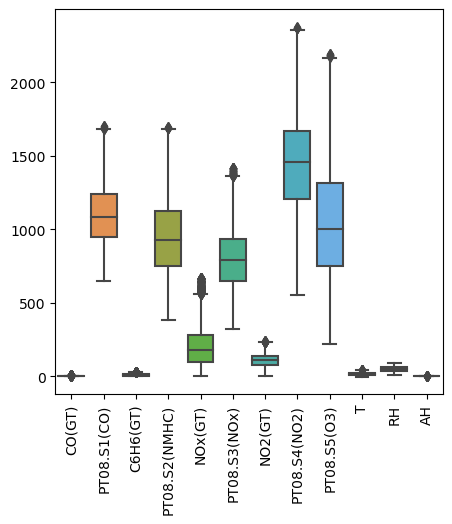

In [50]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data)
plt.xticks(rotation='vertical')
plt.show()

In [51]:
data.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.764214,0.818742,0.793443,0.611835,-0.650128,0.612098,0.514155,0.730543,0.041230,0.017291,0.042827
PT08.S1(CO),0.764214,1.000000,0.787086,0.857705,0.571391,-0.763794,0.611716,0.609761,0.869949,0.041469,0.137029,0.138929
C6H6(GT),0.818742,0.787086,1.000000,0.898001,0.538212,-0.691547,0.570380,0.695052,0.760228,0.232519,-0.080489,0.178120
PT08.S2(NMHC),0.793443,0.857705,0.898001,1.000000,0.561746,-0.769854,0.618405,0.729951,0.845758,0.246505,-0.080966,0.197541
NOx(GT),0.611835,0.571391,0.538212,0.561746,1.000000,-0.624691,0.660135,0.109534,0.634187,-0.219216,0.152022,-0.136366
PT08.S3(NOx),-0.650128,-0.763794,-0.691547,-0.769854,-0.624691,1.000000,-0.613802,-0.463093,-0.788656,-0.069404,-0.115284,-0.190315
NO2(GT),0.612098,0.611716,0.570380,0.618405,0.660135,-0.613802,1.000000,0.130671,0.667341,-0.155271,-0.110056,-0.311272
PT08.S4(NO2),0.514155,0.609761,0.695052,0.729951,0.109534,-0.463093,0.130671,1.000000,0.516703,0.586646,-0.037069,0.649724
PT08.S5(O3),0.730543,0.869949,0.760228,0.845758,0.634187,-0.788656,0.667341,0.516703,1.000000,-0.027426,0.138869,0.080777
T,0.041230,0.041469,0.232519,0.246505,-0.219216,-0.069404,-0.155271,0.586646,-0.027426,1.000000,-0.573149,0.661933


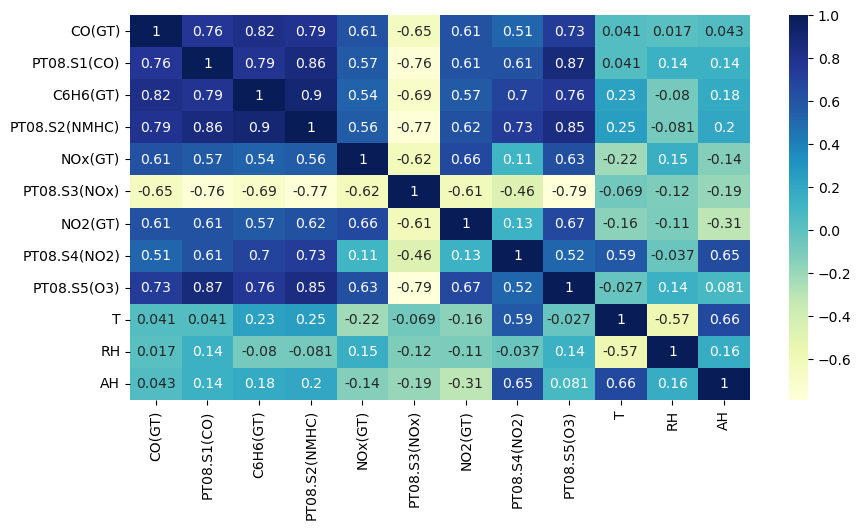

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

**According to Pearson's correlation, 0 correlation represents no relation. Positive and Negative correlation depicts that there exists some relation.**

In [66]:
print(data.head())

         Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0  2004-03-10  18.00.00     2.6       1360.0      11.9         1046.0   
1  2004-03-10  19.00.00     2.0       1292.0       9.4          955.0   
2  2004-03-10  20.00.00     2.2       1402.0       9.0          939.0   
3  2004-03-10  21.00.00     2.2       1376.0       9.2          948.0   
4  2004-03-10  22.00.00     1.6       1272.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888  


- We have Handled Outliers and Missing values
- Let's Identify some trends.

# Time-Series Trends

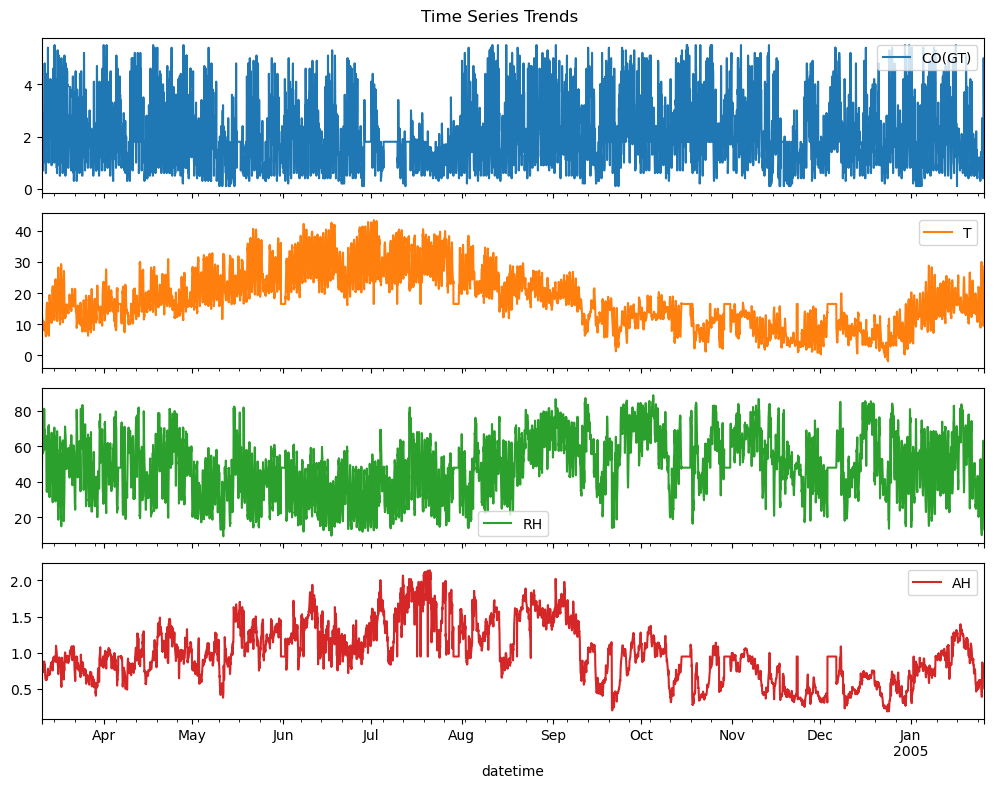

In [69]:
## Combine Date and Time into a single datetime column
data['datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'], format='%Y-%m-%d %H.%M.%S')

# Set the datetime column as the index
data.set_index('datetime', inplace=True)

# Plot time-series for key variables
data[['CO(GT)', 'T', 'RH', 'AH']].plot(subplots=True, figsize=(10, 8), title='Time Series Trends')
plt.tight_layout()
plt.show()



# Seasonality

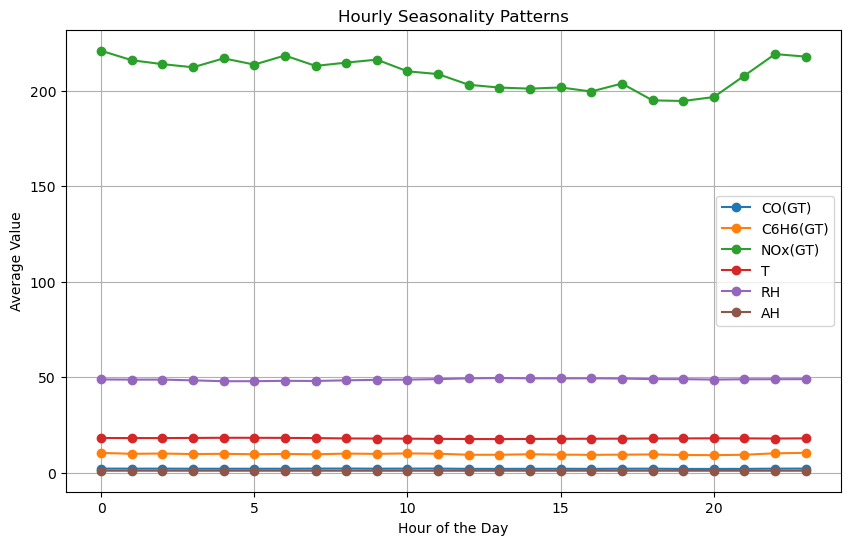

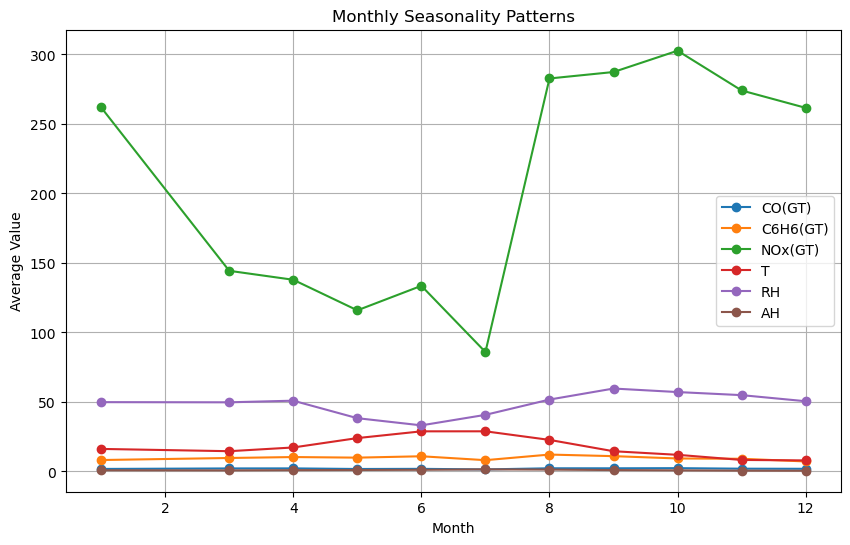

In [72]:
# Add features for seasonality
data['hour'] = pd.to_datetime(data['Time'], format='%H.%M.%S').dt.hour
data['month'] = pd.to_datetime(data['Date'], format='%Y-%m-%d').dt.month
data['day_of_week'] = pd.to_datetime(data['Date'], format='%Y-%m-%d').dt.dayofweek

# Aggregate data by hour and month
hourly_avg = data.groupby('hour')[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'T', 'RH', 'AH']].mean()
monthly_avg = data.groupby('month')[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'T', 'RH', 'AH']].mean()

# Plot hourly patterns
hourly_avg.plot(figsize=(10, 6), title='Hourly Seasonality Patterns', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.grid()
plt.show()

# Plot monthly patterns
monthly_avg.plot(figsize=(10, 6), title='Monthly Seasonality Patterns', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.grid()
plt.show()



# Hour, Day, Month

In [73]:
# Convert Date and Time into datetime format
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%Y-%m-%d %H.%M.%S')

# Extract Hour, Day, and Month
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month


# Lag Features

In [74]:
# Lag features for air quality indicators
air_quality_columns = ['CO(GT)']
for col in air_quality_columns:
    data[f'{col}_lag1'] = data[col].shift(1)
    data[f'{col}_lag2'] = data[col].shift(2)
    
data.dropna(inplace=True)

data[air_quality_columns + [f'{col}_lag1' for col in air_quality_columns]].head()

,CO(GT),CO(GT)_lag1
datetime,,
2004-03-10 20:00:00,2.2,2.0
2004-03-10 21:00:00,2.2,2.2
2004-03-10 22:00:00,1.6,2.2
2004-03-10 23:00:00,1.2,1.6
2004-03-11 00:00:00,1.2,1.2


# Rolling Statistics

In [75]:
# Rolling statistics for air quality and environmental factors
rolling_columns = air_quality_columns + ['T', 'RH', 'AH']
for col in rolling_columns:
    data[f'{col}_rolling_mean'] = data[col].rolling(window=3).mean()
    data[f'{col}_rolling_std'] = data[col].rolling(window=3).std()
    
data.fillna(method='bfill', inplace=True)

data[rolling_columns + [f'{col}_rolling_mean' for col in rolling_columns]].head()

,CO(GT),T,RH,AH,CO(GT)_rolling_mean,T_rolling_mean,RH_rolling_mean,AH_rolling_mean
datetime,,,,,,,,
2004-03-10 20:00:00,2.2,11.9,54.0,0.7502,2.000000,11.366667,57.866667,0.775233
2004-03-10 21:00:00,2.2,11.0,60.0,0.7867,2.000000,11.366667,57.866667,0.775233
2004-03-10 22:00:00,1.6,11.2,59.6,0.7888,2.000000,11.366667,57.866667,0.775233
2004-03-10 23:00:00,1.2,11.2,59.2,0.7848,1.666667,11.133333,59.600000,0.786767
2004-03-11 00:00:00,1.2,11.3,56.8,0.7603,1.333333,11.233333,58.533333,0.777967


In [76]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['Hour'] = data['datetime'].dt.hour.astype(float)

# Normalizing data

In [77]:
# Select float-type columns for normalization
columns_to_normalize = data.select_dtypes(include=['float64']).columns

# Normalize the values
data_values = data[columns_to_normalize].values
scaler = MinMaxScaler()
data_values = scaler.fit_transform(data_values)

# Adjusting Sequence Length for Time-Series Analysis

In [78]:
# Define the sequence length
sequence_length = 10  
sequences = []
for i in range(len(data_values) - sequence_length):
    sequence = data_values[i:i + sequence_length]
    sequences.append(sequence)

data_sequences = np.array(sequences)

# Splitting and Training

In [136]:
# Split into train and test sets
train_data_share = 0.8
train_data = data_sequences[:int(len(data_sequences) * train_data_share)]
test_data = data_sequences[int(len(data_sequences) * train_data_share):]

# Print test data shape
print(f"Test data shape: {test_data.shape}")


Test data shape: (1541, 10, 23)


# LSTM

In [137]:
input_size = len(columns_to_normalize)
output_size = input_size
lstm_units = 5  

# Build the LSTM model
model = Sequential()
model.add(LSTM(lstm_units, return_sequences=True, input_shape=(sequence_length, input_size)))
model.add(Dropout(0.2))
model.add(LSTM(lstm_units, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_size))



# Compiling and Summary

In [138]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 5)             580       
                                                                 
 dropout_4 (Dropout)         (None, 10, 5)             0         
                                                                 
 lstm_5 (LSTM)               (None, 5)                 220       
                                                                 
 dropout_5 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 23)                138       
                                                                 
Total params: 938 (3.66 KB)
Trainable params: 938 (3.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# MAE, MSE, RMSE

In [157]:

mae_lstm = mean_absolute_error(actual_values_lstm, lstm_pred)
mse_lstm = mean_squared_error(actual_values_lstm, lstm_pred)
rmse_lstm = np.sqrt(mse_lstm)

print(f"LSTM MAE: {mae_lstm}, MSE: {mse_lstm}, RMSE: {rmse_lstm}")

LSTM MAE: 0.2633956284592186, MSE: 0.11296726182497262, RMSE: 0.3361060276534365


- ARIMA works for just one variable.

# Arima Model

In [84]:
# Assuming you're using the 'CO(GT)' column for ARIMA
series = data['CO(GT)']

# Check for stationarity
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("The series is not stationary. Differencing may be needed.")
    else:
        print("The series is stationary.")

adf_test(series)



ADF Statistic: -9.757208486560712
p-value: 7.732359224173022e-17
The series is stationary.


In [122]:
# Fit ARIMA model (example parameters, you can optimize them)
arima_model = ARIMA(series, order=(1, 1, 1))  # Adjust p, d, q based on ACF/PACF
arima_model_fit = arima_model.fit()

# Summary of the ARIMA model
print(arima_model_fit.summary())

# Predictions from ARIMA
arima_pred = arima_model_fit.forecast(steps=30)





C:\Users\Haeir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Haeir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Haeir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 CO(GT)   No. Observations:                 7713
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9286.331
Date:                Sun, 01 Dec 2024   AIC                          18578.662
Time:                        00:30:53   BIC                          18599.513
Sample:                    03-10-2004   HQIC                         18585.812
                         - 01-26-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6879      0.008     88.158      0.000       0.673       0.703
ma.L1         -0.9930      0.002   -643.005      0.000      -0.996      -0.990
sigma2         0.6505      0.007     89.556      0.0

In [159]:
# MSE and RMSE for ARIMA predictions
mse_arima = mean_squared_error(actual_values[:30], arima_pred)
rmse_arima = np.sqrt(mse_arima)

# Output MSE and RMSE for ARIMA
print(f"ARIMA MSE: {mse_arima}")
print(f"ARIMA RMSE: {rmse_arima}")

ARIMA MSE: 2.0906271235684697
ARIMA RMSE: 1.44590010843366


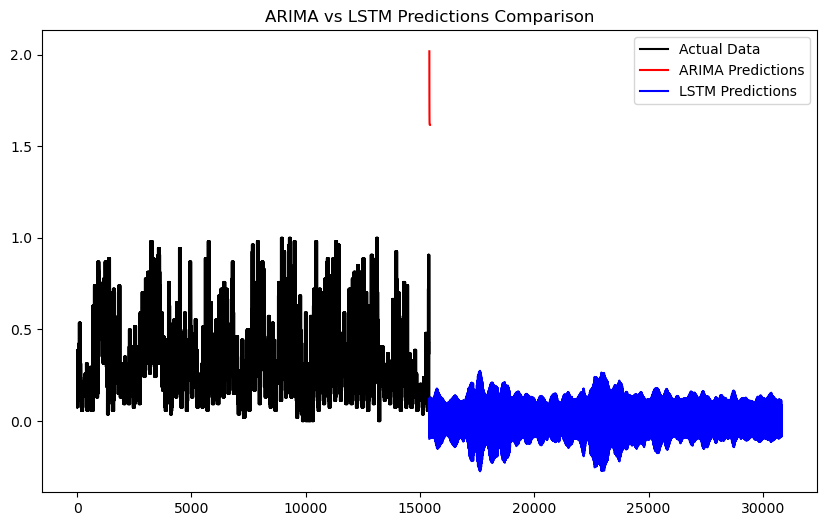

In [135]:
# Plotting the predictions for comparison
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Data', color='black')
plt.plot(range(len(actual_values), len(actual_values) + len(arima_pred)), arima_pred, label='ARIMA Predictions', color='red')
plt.plot(range(len(actual_values), len(actual_values) + len(lstm_pred)), lstm_pred, label='LSTM Predictions', color='blue')
plt.legend()
plt.title("ARIMA vs LSTM Predictions Comparison")
plt.show()

# Conclusion
LSTM Performance:

MAE: 0.2634, 
MSE: 0.1130, 
RMSE: 0.3361

ARIMA Performance:

MSE: 2.0906,
RMSE: 1.4459

The LSTM model demonstrates superior predictive performance across all available metrics (MSE, RMSE, and MAE). This suggests that for this dataset, the LSTM's ability to capture complex, nonlinear patterns in multivariate data offers a significant advantage over ARIMA, which is designed for univariate, linear time series data.